In [1]:
#imports
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter

%store -r races
%store -r races2

In [6]:
###########################################################################################################################
#This method calculates the percentage of a population that is considered a minority group
#input: counties to run for, threshold to run at
#output: returns a list of percentages of minorities for each counties
###########################################################################################################################

def get_finalvals(counties, threshold):
    final_values = []
    final_values3 = []

    for county in counties:
        df = pd.read_csv (r'../homemade_data/'+county+'.csv')
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        df = df.loc[:, ~df.columns.str.contains('SwapVal')]


        for index, row in df.iterrows():
            d = row['race']
            h = row['hispanic']
            if d in races and h==1:
                df.at[index, 'race'] = races.index(d)
            elif d in races and h==0:
                df.at[index, 'race'] = races.index(d)+63

        labels_all = []
        vals_all = []

        for key, value in df.iteritems():
            if(key == 'race'):
                labels, values = zip(*Counter(value).items())
                labels=list(labels)
                values = list(values)
                for i in range(0, 126):
                    if i not in labels:
                        labels_all.append(i)
                        vals_all.append(0)
                    elif i in labels:
                        pos = labels.index(i)
                        labels_all.append(i)
                        vals_all.append(values[pos])
        labels_all = np.arange(0,126,1)


        #get percent race occurrences of each race in original data (only calculate for minorites >5%)
        total = 0
        for e in range(0, len(vals_all)):
            total = total + vals_all[e]
        final = []
        final2 = []
        sad = []
        for i in range(0,len(vals_all)):
            if vals_all[i]/total <= threshold:
                final.append(i)
                if(vals_all[i] !=0):
                    final2.append(i)
                sad.append(vals_all[i])

        final_values.append(len(final2))
        final_values3.append(sum(sad)/total*100)
        #print(county, len(final), len(final2),sum(sad))
        
    return final_values, final_values3

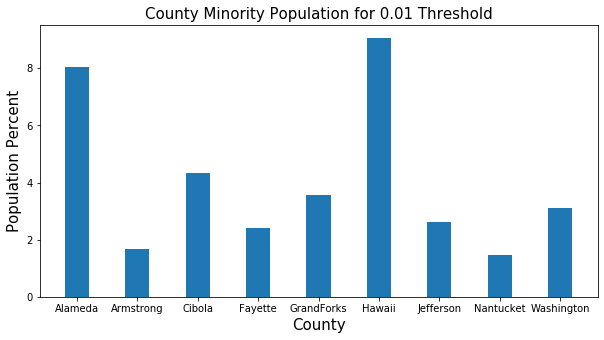

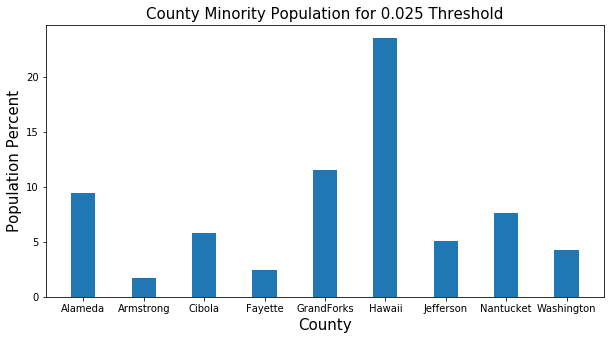

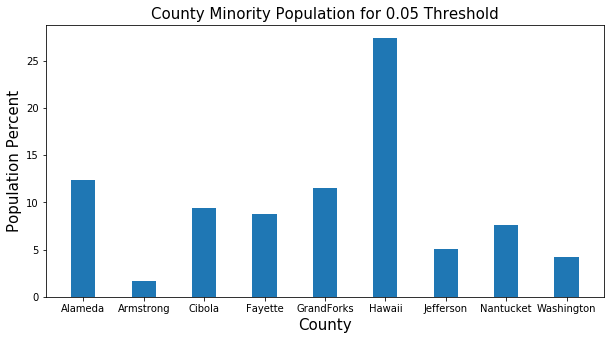

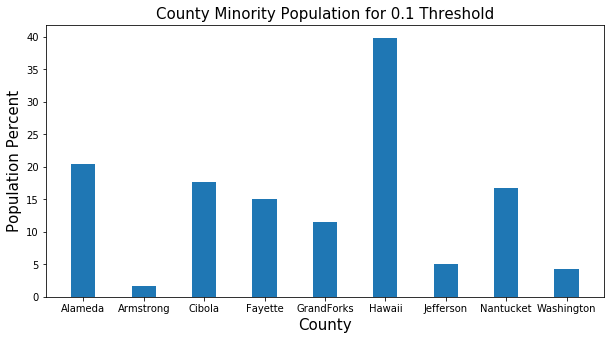

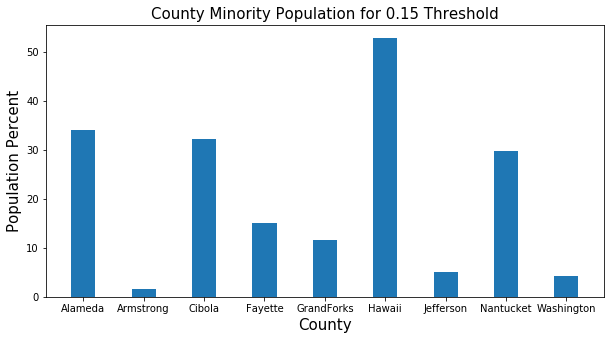

In [8]:
#RUN DATA

import numpy as np
import matplotlib.pyplot as plt

thresholds = [.01, .025, .05, .1, .15]
for threshold in thresholds:
    final_values, final_values3 = get_finalvals(counties, threshold)
    fig = plt.figure(figsize = (10, 5))
    plt.bar(counties, final_values3, width = 0.4)
    plt.title('County Minority Population for '+str(threshold)+ ' Threshold', size='15')
    plt.xlabel('County', size='15')
    plt.ylabel('Population Percent', size='15')